In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

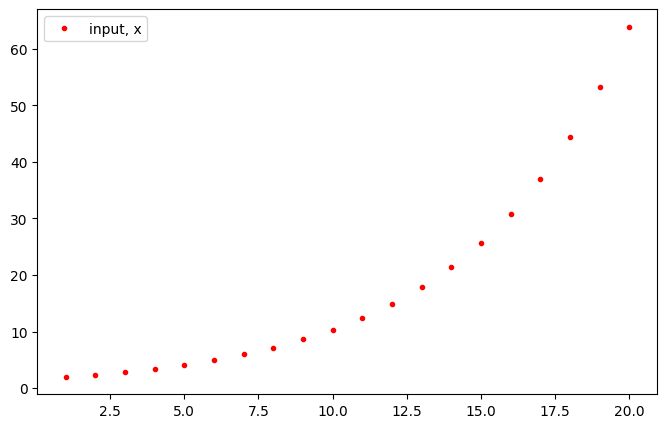

In [ ]:
# !pip install torchinfo
plt.figure(figsize=(8,5))
n=20
start,r=2,1.2
x=np.arange(1,n+1)
y=[]

for i in range(n):
  if i==0:
    y.append(start)
  else:
    y.append(y[i-1]*r)

y=np.array(y)
plt.plot(x, y, 'r.', label='input, x') # x

plt.legend()
plt.show()



In [ ]:
class RnnModel(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,output_size):
    super().__init__()

    self.rnn=nn.RNN(input_size,hidden_size,num_layers)
    self.linear=nn.Linear(hidden_size,output_size)
  def forward(self,x):
    r_out,hidden=self.rnn(x)
    return self.linear(hidden)

model=RnnModel(1,5,1,1)

In [ ]:
x_tensor=(torch.from_numpy(x)).unsqueeze(0).type(torch.float32).permute(1,0)
y_tensor=(torch.from_numpy(y)).unsqueeze(0).type(torch.float32).permute(1,0)
with torch.inference_mode():
  pred=model(x_tensor)

print(pred)

tensor([[1.2432]])


In [ ]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)

Loss:  0.05139177292585373


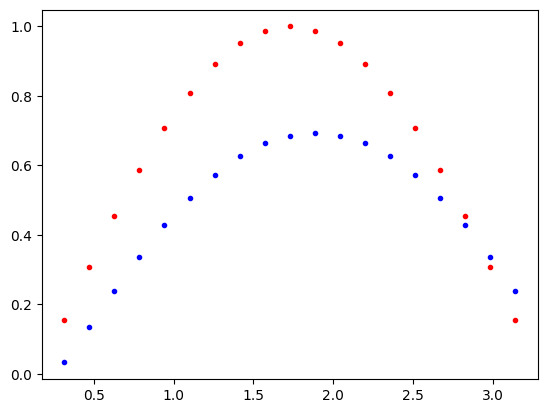

Loss:  0.035595424473285675


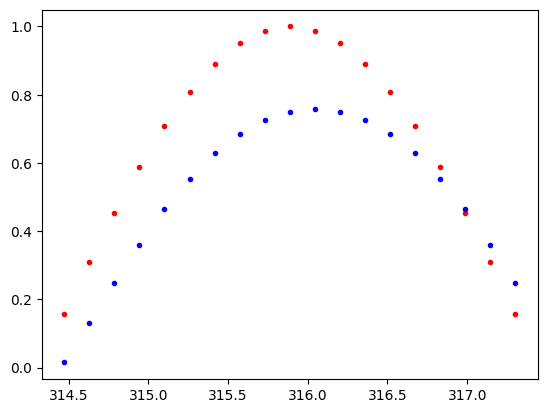

Loss:  0.0256972573697567


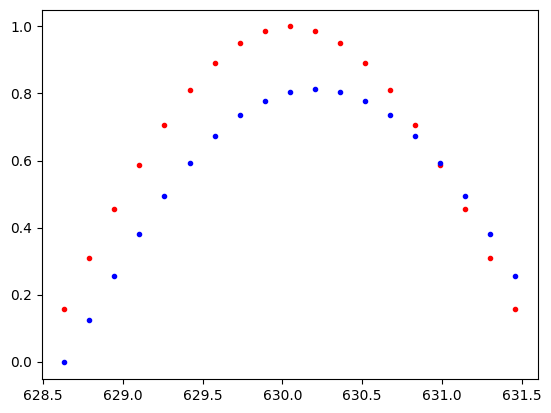

Loss:  0.019825764000415802


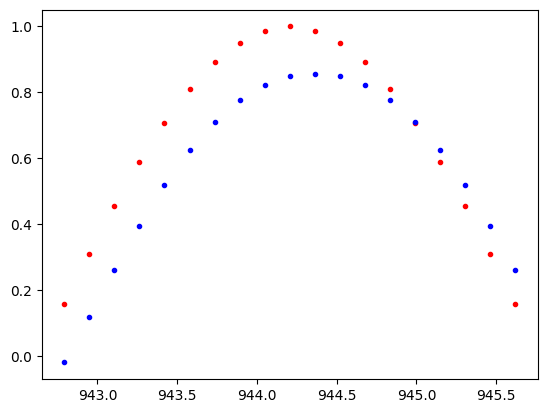

Loss:  0.016572052612900734


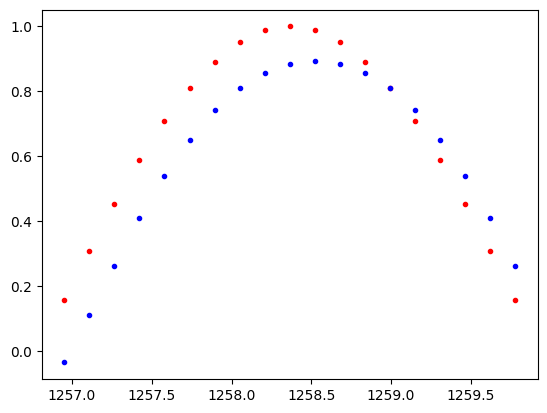

Loss:  0.014965152367949486


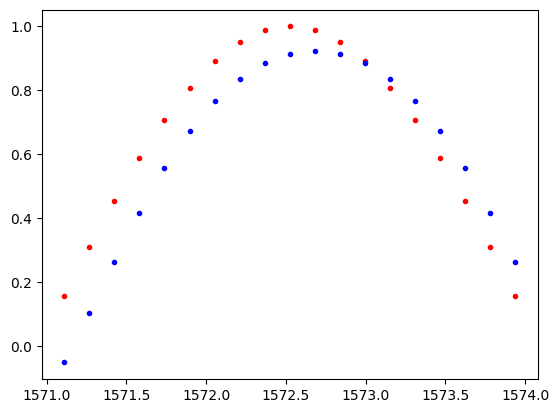

Loss:  0.014355088584125042


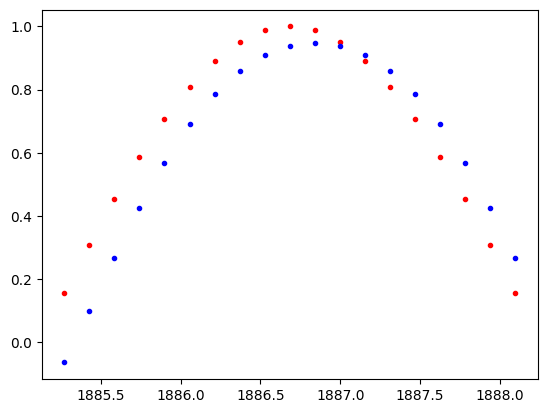

Loss:  0.014310498721897602


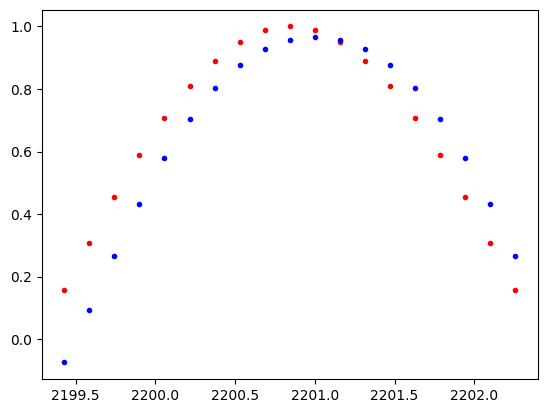

Loss:  0.01454849261790514


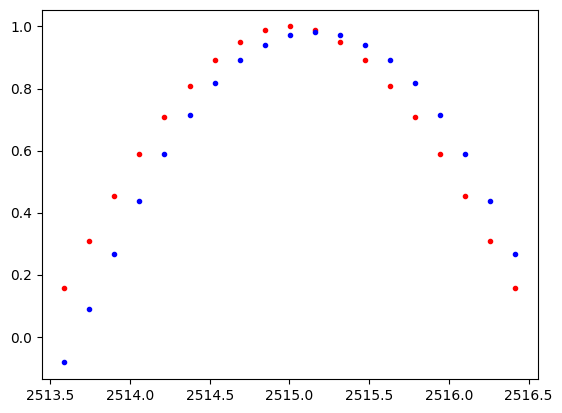

Loss:  0.014888912439346313


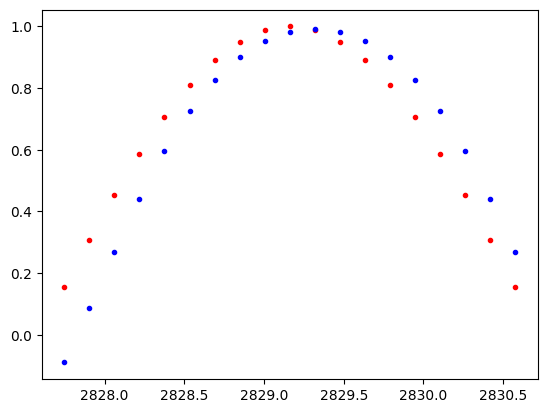

RnnModel(
  (rnn): RNN(1, 5)
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
def train(x_tensor,y_tensor,rnn, n_steps, print_every,seq_length):

    for batch_i, step in enumerate(range(n_steps)):

        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]

        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction=rnn(x_tensor)
        loss = loss_fn(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[2:],x[1:], 'r.') # input
            plt.plot(time_steps[2:], prediction.squeeze().detach().numpy()[:-1],'b.') # predictions
            plt.show()

    return rnn

train(x_tensor,y_tensor,model,1000,100,20)

In [ ]:
model.eval()
with torch.inference_mode():
  y_pred=model(x_tensor)
  print(y_pred)

tensor([[1.2372]])
